# Use code from https://www.kaggle.com/endoruk1234/trafficlightdetection-fasterrcnn-pytorch#Reading-CSV-File-and-Preprocessing

In [1]:
import torch
import torchvision
from PreData import GetDataset
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class arguments():
    split = 'random'
    pixel = 28 # image pixels
    epochs = 1
    batch_size = 64
    seed = 0
    device = 'cpu'
    image_time = 'day' # or night
    parent_path = '../../LISA_Traffic_Light2/app-data/RawData/'
    annotation_path = '../../LISA_Traffic_Light2/app-data/RawData/Annotations/'+image_time+'Train'   # './RawData/Annotations/nightTrain/'
args = arguments

In [5]:
TrainDs, _, TestDs = GetDataset(args)
trainloader = torch.utils.data.DataLoader(TrainDs, len(TrainDs))
testloader = torch.utils.data.DataLoader(TestDs, len(TestDs))
x_train, y_train = next(iter(trainloader))
x_test, y_test = next(iter(testloader))

In [7]:
np.savez_compressed('../app-data/TrafficImages.npz',
        x_train = x_train.numpy(), y_train = y_train.numpy(),
        x_test = x_test.numpy(), y_test = y_test.numpy())

In [9]:
def collate_fn(batch):
    return tuple(zip(*batch))

trainDataLoader = DataLoader(
    trainDataset,
    batch_size=64,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fn
    )

valDataLoader = DataLoader(
        valDataset,
        batch_size=64,
        shuffle=False,
        num_workers=0,
        collate_fn=collate_fn
    )

testDataLoader = DataLoader(
        testDataset,
        batch_size=64,
        shuffle=False,
        num_workers=0,
        collate_fn=collate_fn
    )

In [10]:
images, labels = next(iter(trainDataLoader))
images = torch.stack(images)
labels = torch.stack(labels)
print(images.shape, labels.shape)

torch.Size([64, 3, 100, 100]) torch.Size([64])


tensor(0.)


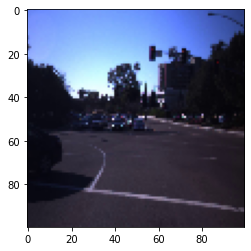

In [11]:
i = 7
print(labels[i])
img = np.array(np.transpose(images, (0,2,3,1)))
f, ax = plt.subplots()
ax.imshow(img[i,:,:,:])

torch.Size([3, 960, 1280])
tensor(0, dtype=torch.uint8)


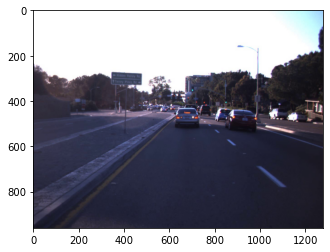

In [11]:
img = torchvision.io.read_image(args.parent_path+'/dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg')
print(img.shape)

image = np.array(np.transpose(img, (1,2,0)))
f, ax = plt.subplots()
ax.imshow(image)

In [14]:
import os
os.system('pip -q install -U albumentations ')

0